In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("WHO-COVID-19-global-data.csv")

In [12]:
# Convert the "Date_reported" column to a datetime object
df["Date_reported"] = pd.to_datetime(df["Date_reported"])



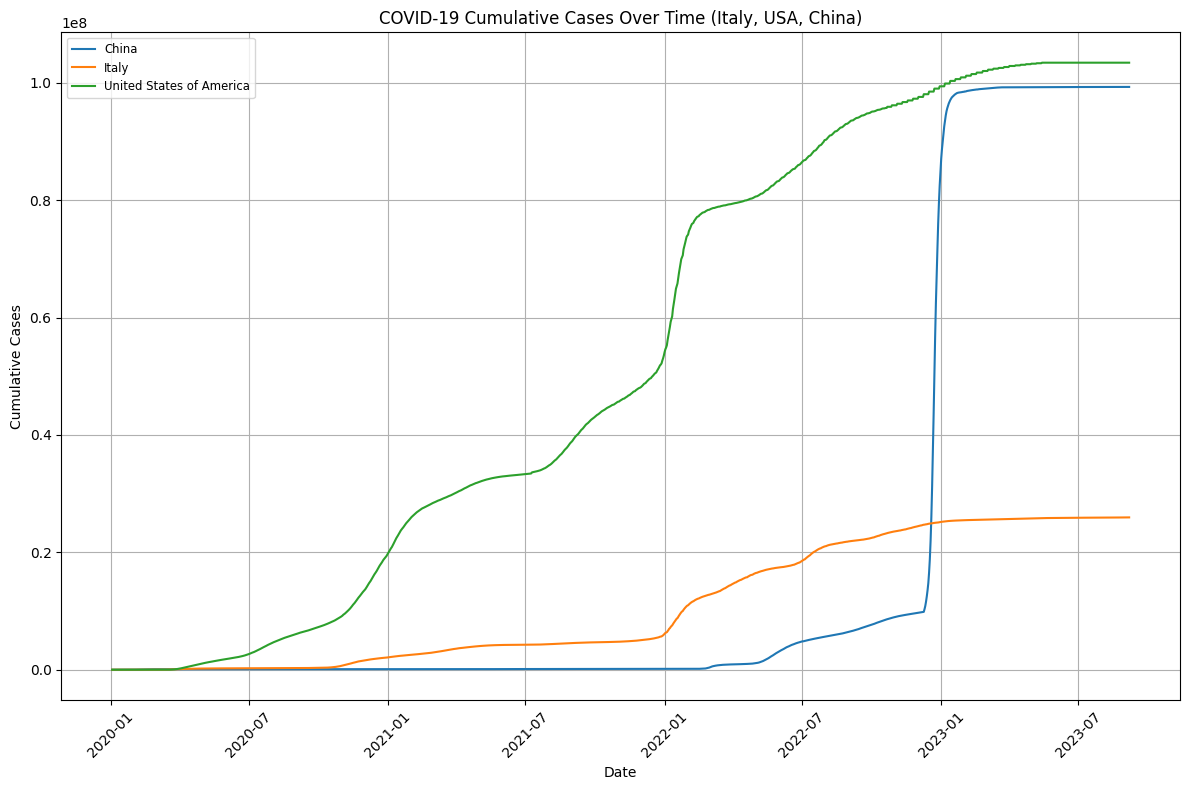

In [14]:
# Filter the data for Italy, United States, and Chicago
selected_countries = ["Italy", "United States of America", "China"]
filtered_df = df[df["Country"].isin(selected_countries)]

# Group the filtered data by country
grouped = filtered_df.groupby("Country")

# Create a figure with a single subplot
plt.figure(figsize=(12, 8))

# Plot the data for Italy, United States, and Chicago
for country, data in grouped:
    plt.plot(data["Date_reported"].values, data["Cumulative_cases"].values, label=country)

# Customize the plot
plt.title("COVID-19 Cumulative Cases Over Time (Italy, USA, China)")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.grid(True)
plt.legend(loc="upper left", fontsize="small")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


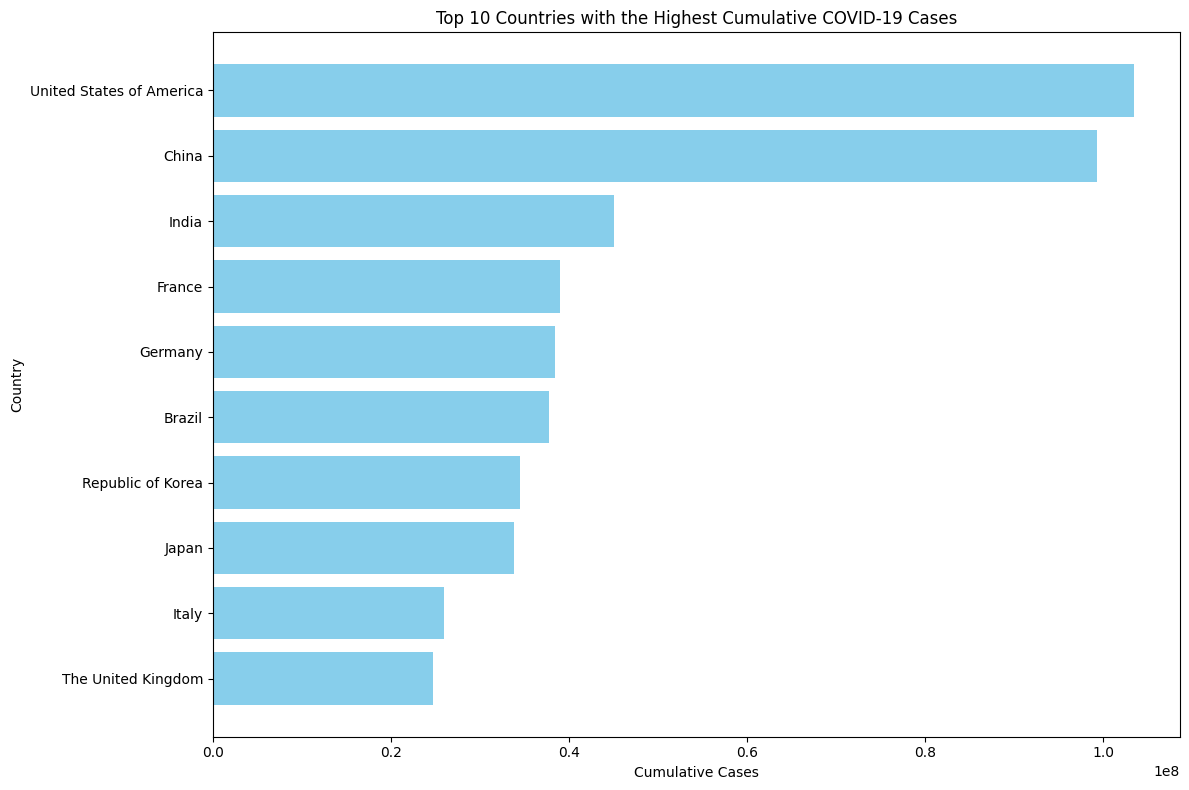

In [15]:
# Group the data by country and calculate the total cumulative cases for each country
country_cumulative_cases = df.groupby("Country")["Cumulative_cases"].max().reset_index()

# Sort the data by cumulative cases in descending order and select the top 10 countries
top_10_countries = country_cumulative_cases.sort_values(by="Cumulative_cases", ascending=False).head(10)

# Create a bar chart to visualize the top 10 countries
plt.figure(figsize=(12, 8))
plt.barh(top_10_countries["Country"], top_10_countries["Cumulative_cases"], color='skyblue')
plt.xlabel("Cumulative Cases")
plt.ylabel("Country")
plt.title("Top 10 Countries with the Highest Cumulative COVID-19 Cases")
plt.gca().invert_yaxis()  # Invert the y-axis to show the country with the highest cases at the top

# Show the plot
plt.tight_layout()
plt.show()

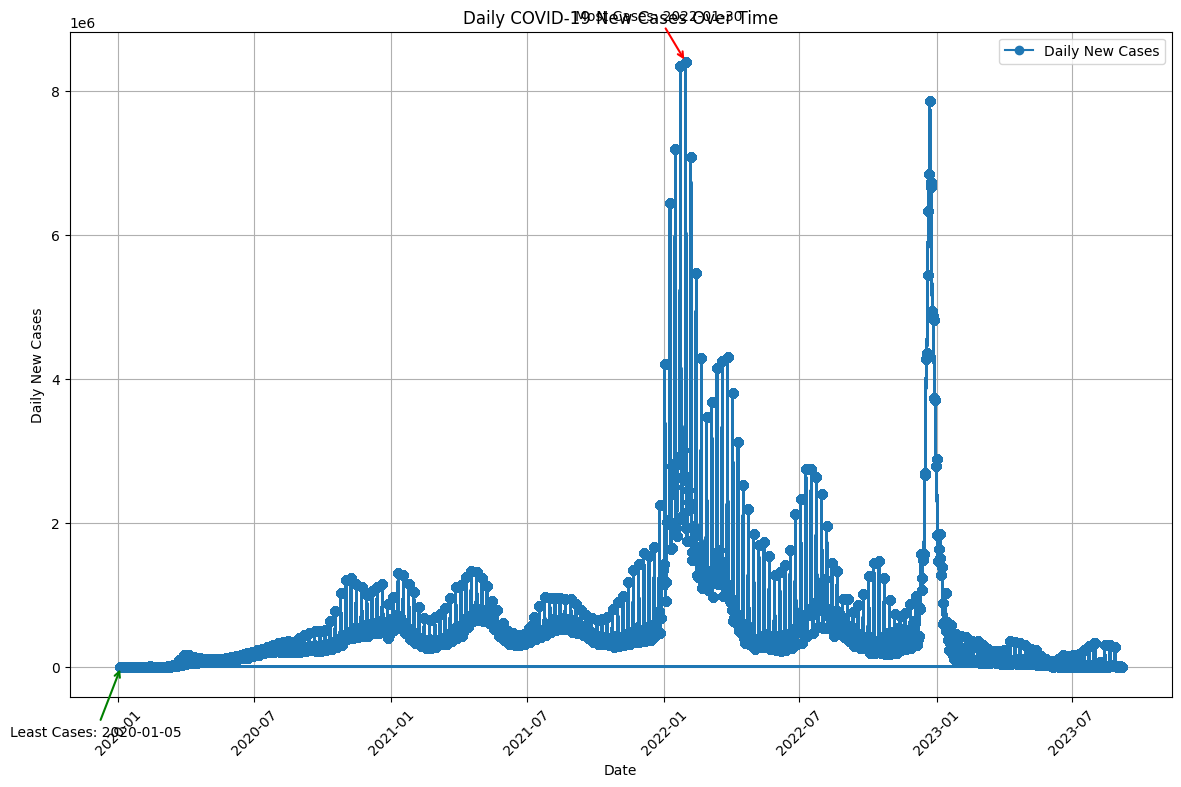

In [18]:
# Convert the "Date_reported" column to a datetime object
df["Date_reported"] = pd.to_datetime(df["Date_reported"])

# Calculate the daily new cases
df["Daily_new_cases"] = df.groupby("Date_reported")["New_cases"].transform("sum")

# Find the date with the most cases
date_most_cases = df.loc[df["Daily_new_cases"].idxmax()]["Date_reported"]

# Find the date with the least cases
date_least_cases = df.loc[df["Daily_new_cases"].idxmin()]["Date_reported"]

# Convert the Date_reported and Daily_new_cases columns to NumPy arrays
date_reported_array = df["Date_reported"].values
daily_new_cases_array = df["Daily_new_cases"].values

# Create a line plot or bar chart for daily new cases
plt.figure(figsize=(12, 8))
plt.plot(date_reported_array, daily_new_cases_array, marker='o', linestyle='-', markersize=6, label="Daily New Cases")
plt.title("Daily COVID-19 New Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.grid(True)

# Highlight the date with the most cases
plt.annotate(f"Most Cases: {date_most_cases.strftime('%Y-%m-%d')}", (date_most_cases, df["Daily_new_cases"].max()),
             xytext=(-80, 30), textcoords='offset points', arrowprops=dict(arrowstyle="->", lw=1.5, color="red"))

# Highlight the date with the least cases
plt.annotate(f"Least Cases: {date_least_cases.strftime('%Y-%m-%d')}", (date_least_cases, df["Daily_new_cases"].min()),
             xytext=(-80, -50), textcoords='offset points', arrowprops=dict(arrowstyle="->", lw=1.5, color="green"))

# Show the plot
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()